In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import os

In [3]:
curr_dir = os.getcwd()
train_path = os.path.join(curr_dir,"dataset","Train")

In [4]:
test_path = os.path.join(curr_dir,"dataset","Test")
valid_path = os.path.join(curr_dir,"dataset","Valid")

In [5]:
training_set = tf.keras.utils.image_dataset_from_directory(
    train_path,
    labels="inferred",
    label_mode="categorical",
    color_mode="rgb",
    image_size=(128,128),
    shuffle=True,
    interpolation="bilinear",
)

Found 900 files belonging to 3 classes.


In [6]:
training_set.class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [7]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    valid_path,
    labels="inferred",
    label_mode="categorical",
    color_mode="rgb",
    image_size=(128,128),
    shuffle=True,
    interpolation="bilinear",
)

Found 300 files belonging to 3 classes.


In [8]:
cnn = tf.keras.models.Sequential()
cnn = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(128, 128, 3)), 
    tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu")
])
cnn.add(tf.keras.layers.BatchNormalization())  
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation="relu"))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding="same",activation="relu")) 
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation="relu"))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding="same",activation="relu"))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation="relu"))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding="same",activation="relu"))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation="relu"))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding="same",activation="relu"))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation="relu"))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Dropout(0.3))

cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))
cnn.add(tf.keras.layers.Dropout(0.5))

cnn.add(tf.keras.layers.Dense(units=3,activation='softmax'))


In [9]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
cnn.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])

In [10]:
cnn.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128, 128, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │         4,503 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,790,355 (29.72 MB)

 Trainable params: 7,790,291 (29.72 MB)

 Non-trainable params: 64 (256.00 B)

In [11]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=24,callbacks=[early_stopping])

Epoch 1/24
29/29 ━━━━━━━━━━━━━━━━━━━━ 122s 4s/step - accuracy: 0.4439 - loss: 0.9828 - val_accuracy: 0.3333 - val_loss: 8.9132
Epoch 2/24
29/29 ━━━━━━━━━━━━━━━━━━━━ 137s 3s/step - accuracy: 0.6734 - loss: 0.6532 - val_accuracy: 0.3333 - val_loss: 2.7329
Epoch 3/24
29/29 ━━━━━━━━━━━━━━━━━━━━ 99s 3s/step - accuracy: 0.7676 - loss: 0.5288 - val_accuracy: 0.3333 - val_loss: 3.1400
Epoch 4/24
29/29 ━━━━━━━━━━━━━━━━━━━━ 98s 3s/step - accuracy: 0.8625 - loss: 0.3473 - val_accuracy: 0.6233 - val_loss: 1.1695
Epoch 5/24
29/29 ━━━━━━━━━━━━━━━━━━━━ 99s 3s/step - accuracy: 0.9079 - loss: 0.2453 - val_accuracy: 0.7433 - val_loss: 0.6032
Epoch 6/24
29/29 ━━━━━━━━━━━━━━━━━━━━ 99s 3s/step - accuracy: 0.9126 - loss: 0.2157 - val_accuracy: 0.7433 - val_loss: 0.8260
Epoch 7/24
29/29 ━━━━━━━━━━━━━━━━━━━━ 101s 3s/step - accuracy: 0.9132 - loss: 0.2254 - val_accuracy: 0.8833 - val_loss: 0.3280
Epoch 8/24
29/29 ━━━━━━━━━━━━━━━━━━━━ 99s 3s/step - accuracy: 0.9070 - loss: 0.2628 - val_accuracy: 0.9200 - val_lo

In [ ]:
train_loss, train_acc = cnn.evaluate(training_set)
print("Training accuracy: ",train_acc)

29/29 ━━━━━━━━━━━━━━━━━━━━ 22s 770ms/step - accuracy: 0.9977 - loss: 0.0139
Training accuracy:  0.9988889098167419


In [ ]:
val_loss, val_acc = cnn.evaluate(validation_set)
print("Validation accuracy: ",val_acc)

10/10 ━━━━━━━━━━━━━━━━━━━━ 7s 660ms/step - accuracy: 0.9668 - loss: 0.1237
Validation accuracy:  0.9800000190734863


In [14]:
cnn.save('trained_plant_disease_model.keras')

In [15]:
training_history.history

{'accuracy': [0.5144444704055786,
  0.7022222280502319,
  0.8066666722297668,
  0.8711110949516296,
  0.9088888764381409,
  0.9211111068725586,
  0.9155555367469788,
  0.9244444370269775,
  0.9066666960716248,
  0.9166666865348816,
  0.8999999761581421,
  0.9399999976158142,
  0.9588888883590698,
  0.948888897895813,
  0.9755555391311646,
  0.9711111187934875,
  0.9588888883590698,
  0.9711111187934875,
  0.9800000190734863,
  0.9622222185134888,
  0.9811111092567444,
  0.9788888692855835,
  0.9877777695655823,
  0.992222249507904],
 'loss': [0.8735361099243164,
  0.6247286200523376,
  0.4674869179725647,
  0.3372388482093811,
  0.24118374288082123,
  0.21195968985557556,
  0.21621984243392944,
  0.2149115651845932,
  0.2838889956474304,
  0.2221064269542694,
  0.27800819277763367,
  0.1735805720090866,
  0.10618875175714493,
  0.12963691353797913,
  0.07300667464733124,
  0.09316039830446243,
  0.12042202055454254,
  0.089684396982193,
  0.06254474818706512,
  0.0926910787820816,
  0.

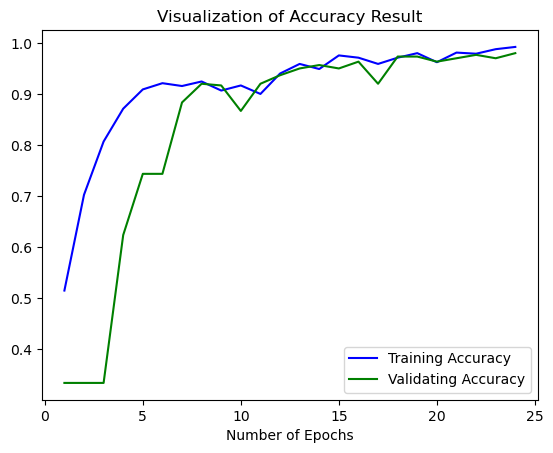

In [16]:
epochs = range(1, len(training_history.history['accuracy']) + 1)
plt.plot(epochs, training_history.history['accuracy'],color='blue',label='Training Accuracy')
plt.plot(epochs, training_history.history['val_accuracy'],color='green',label='Validating Accuracy')
plt.xlabel("Number of Epochs")
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()